In [17]:
import pandas as pd
import os

import matplotlib.pyplot as plt

In [70]:
DATA_PATH = "/home/gjxodud1/2023_aisc/data"
TRAIN_FILE_NAME = "train_data.csv"
TEST_FILE_NAME = "test_data.csv"
ANSWER_SAMPLE_FILE_NAME = "answer_sample.csv"

In [71]:
train_df = pd.read_csv(os.path.join(DATA_PATH, TRAIN_FILE_NAME))
test_df = pd.read_csv(os.path.join(DATA_PATH, TEST_FILE_NAME))
ans_sample_df = pd.read_csv(os.path.join(DATA_PATH, ANSWER_SAMPLE_FILE_NAME))

In [72]:
train_df.isna().sum()

air_inflow       0
air_end_temp     0
out_pressure     0
motor_current    0
motor_rpm        0
motor_temp       0
motor_vibe       0
type             0
dtype: int64

In [21]:
test_df.isna().sum()

air_inflow       0
air_end_temp     0
out_pressure     0
motor_current    0
motor_rpm        0
motor_temp       0
motor_vibe       0
type             0
dtype: int64

In [22]:
test_df

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0
...,...,...,...,...,...,...,...,...
7384,2.12,48.08,0.7,27.45,2246.0,64.96,3.25,7
7385,1.48,39.63,0.7,19.19,1570.0,57.44,2.87,7
7386,1.56,40.61,0.7,20.15,1649.0,58.32,2.92,7
7387,1.59,40.99,0.7,20.52,1679.0,58.66,2.93,7


In [23]:
ans_sample_df

,type,label
0,0,-1
1,0,-1
2,0,-1
3,0,-1
4,0,-1
...,...,...
7384,7,-1
7385,7,-1
7386,7,-1
7387,7,-1


In [8]:
sensor_list = ['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']

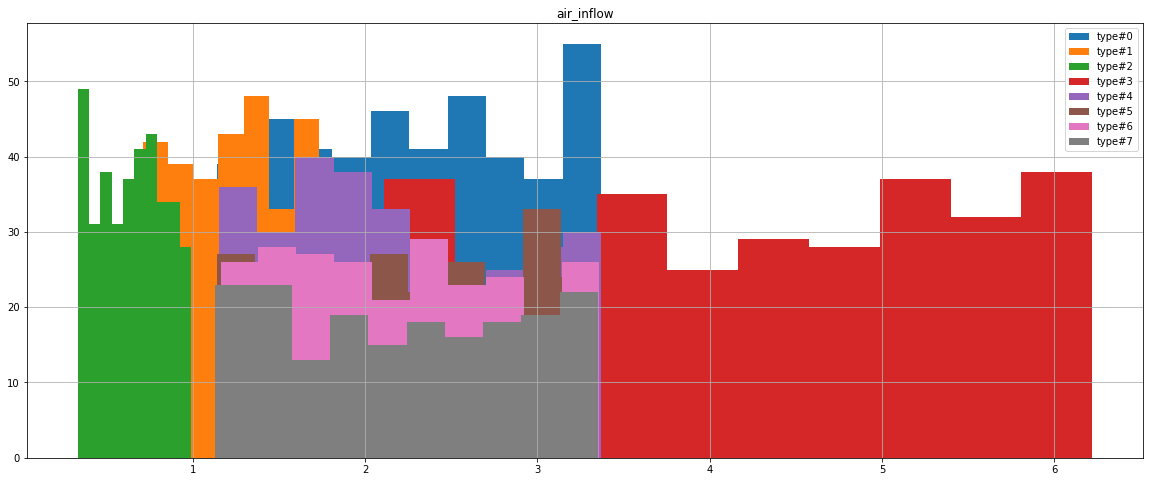

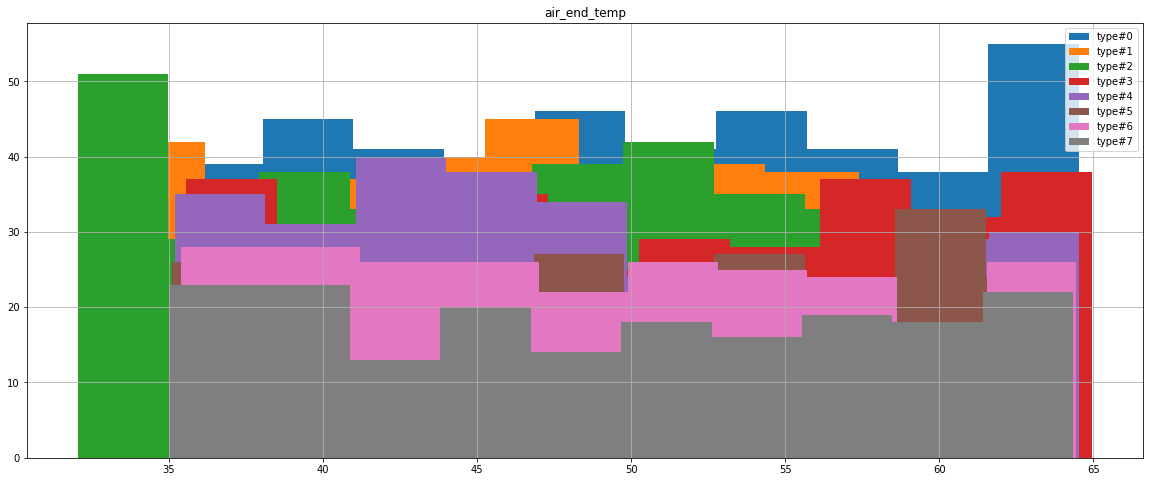

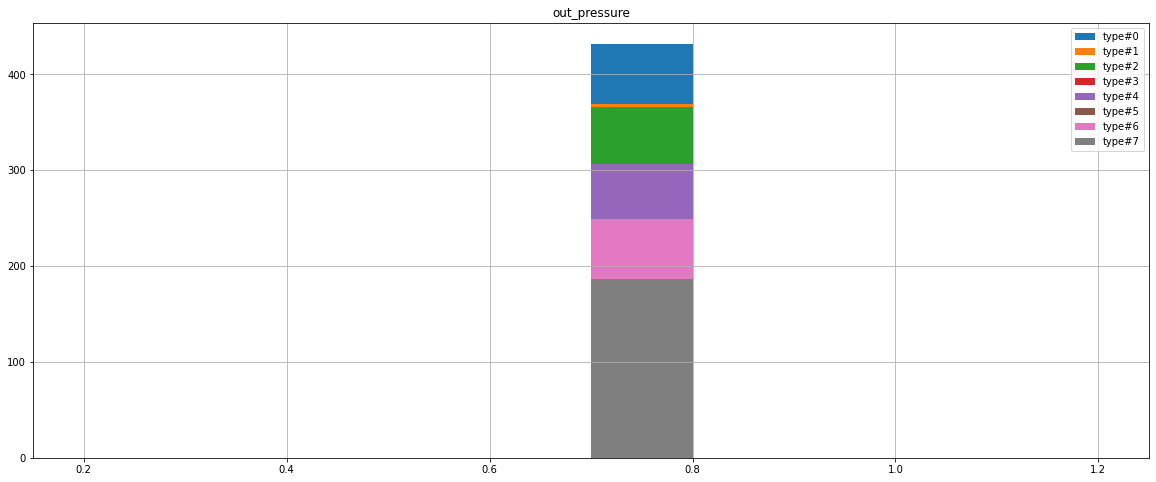

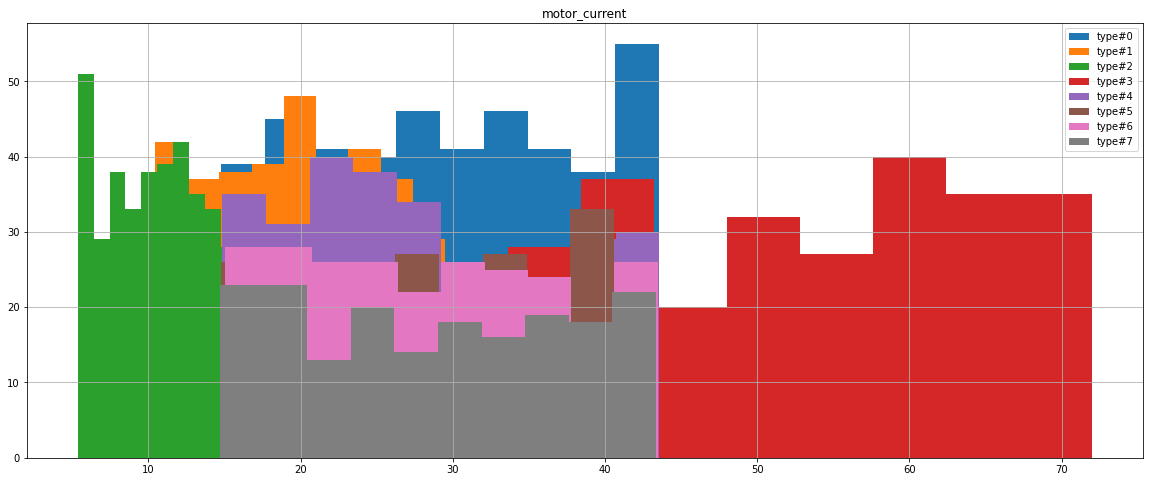

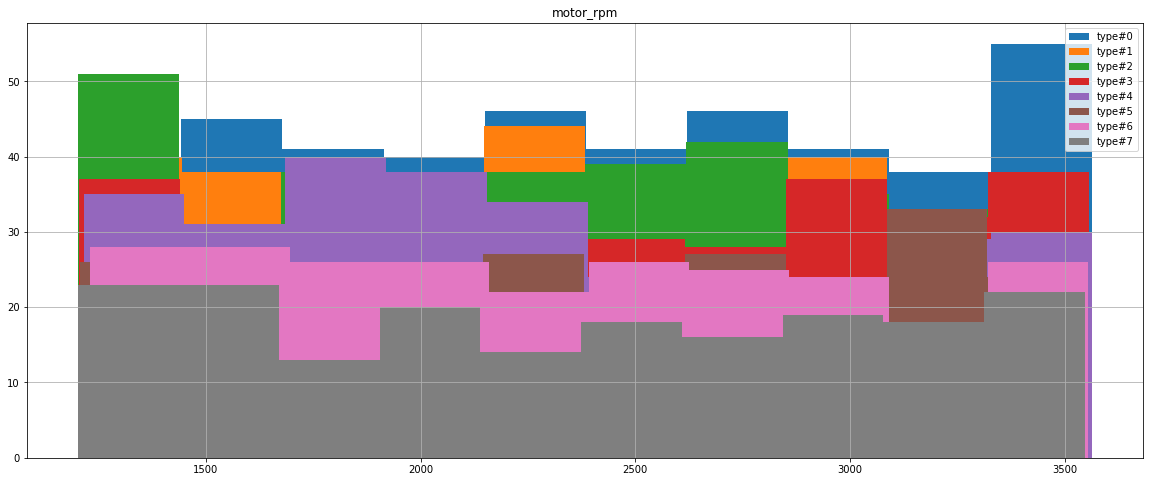

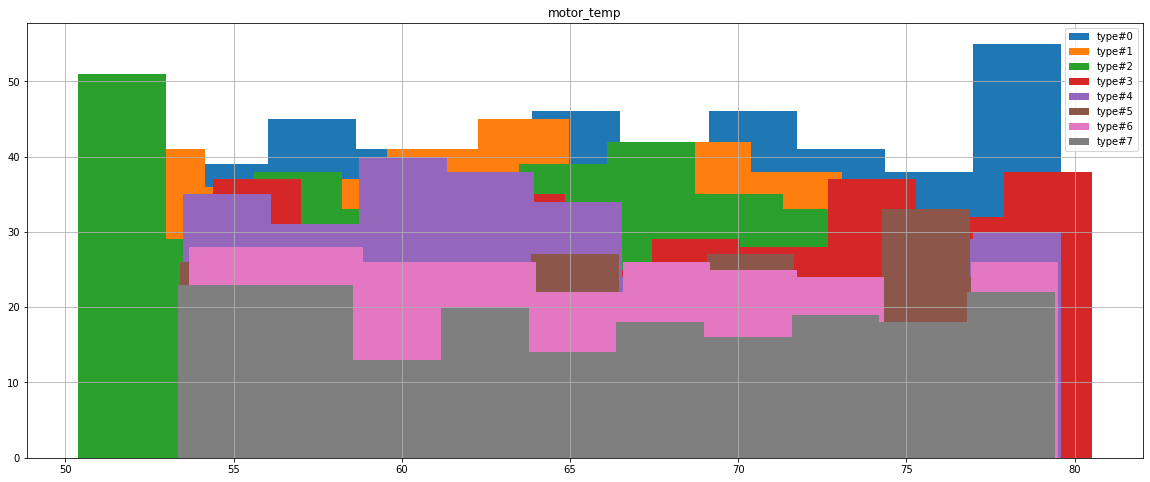

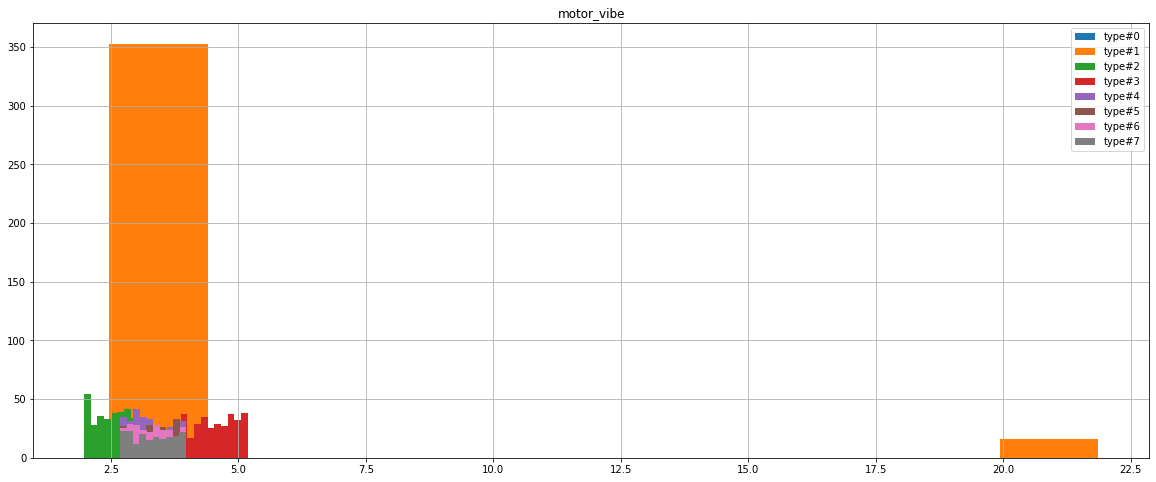

In [9]:
for sensor in sensor_list:
    plt.figure(figsize=(20,8))
    plt.title(f"{sensor}")
    for type, type_df in train_df.groupby("type"):
        # if type not in [0, 4, 5, 6, 7]:
        #     continue
        type_df[sensor].hist(label=f"type#{type}")
    plt.legend()

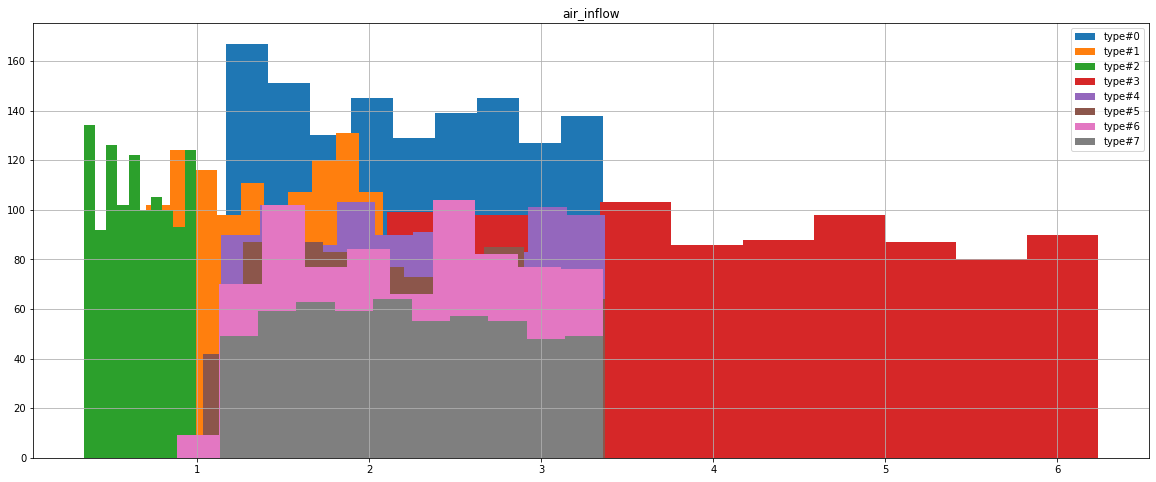

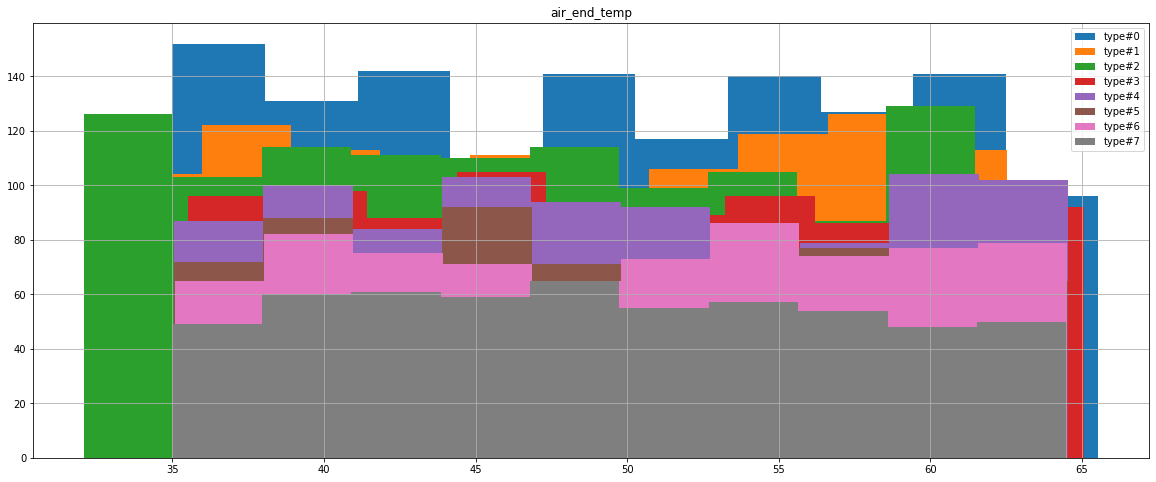

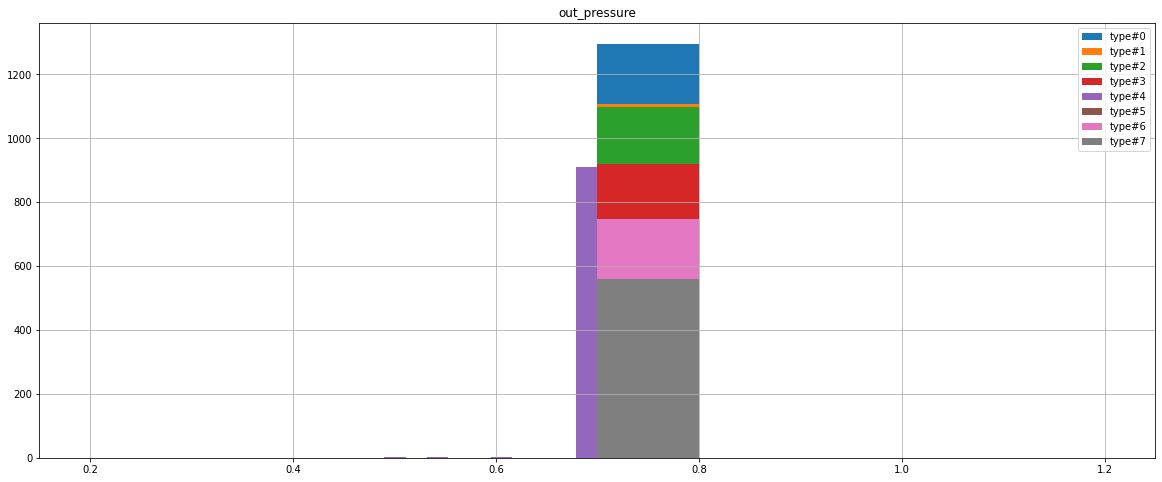

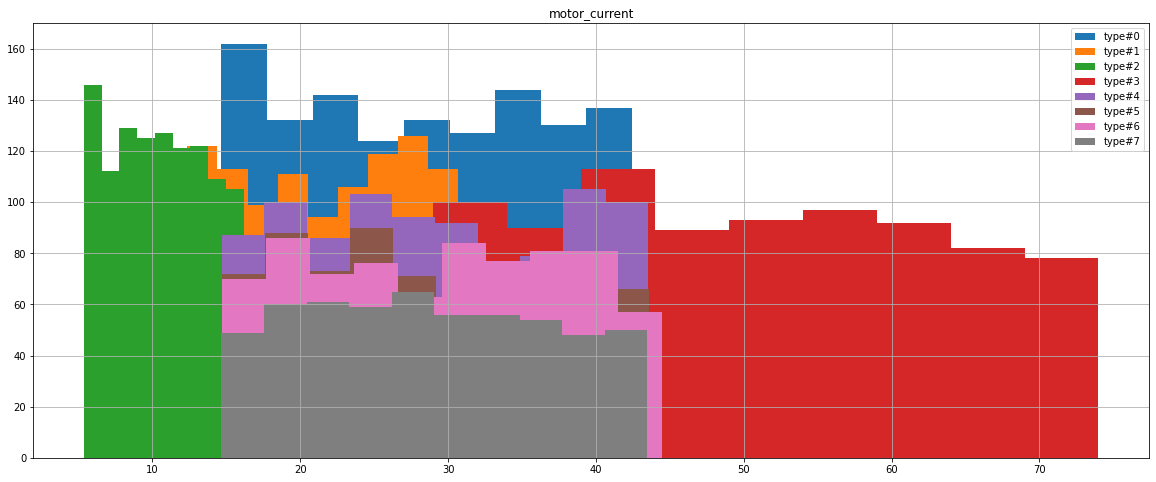

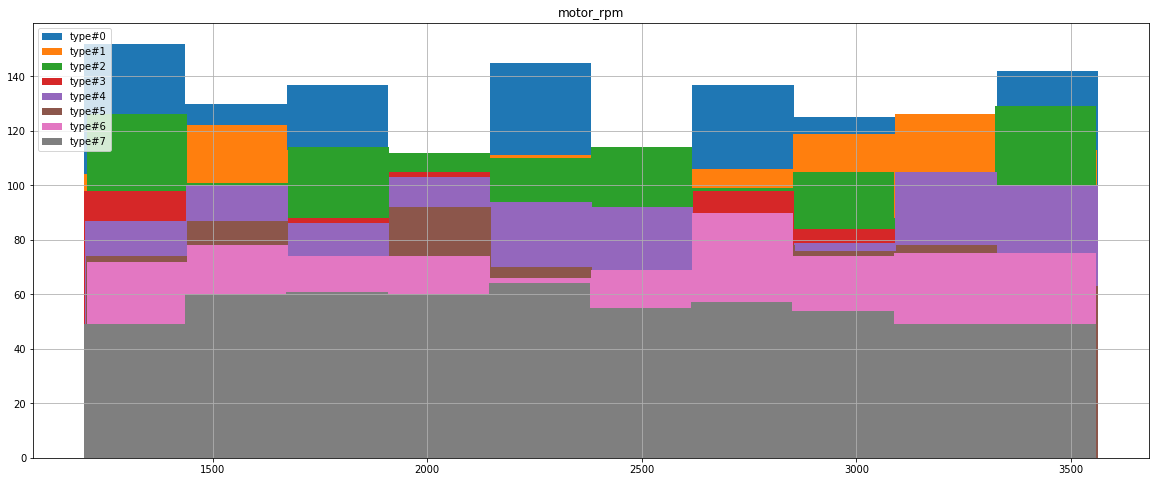

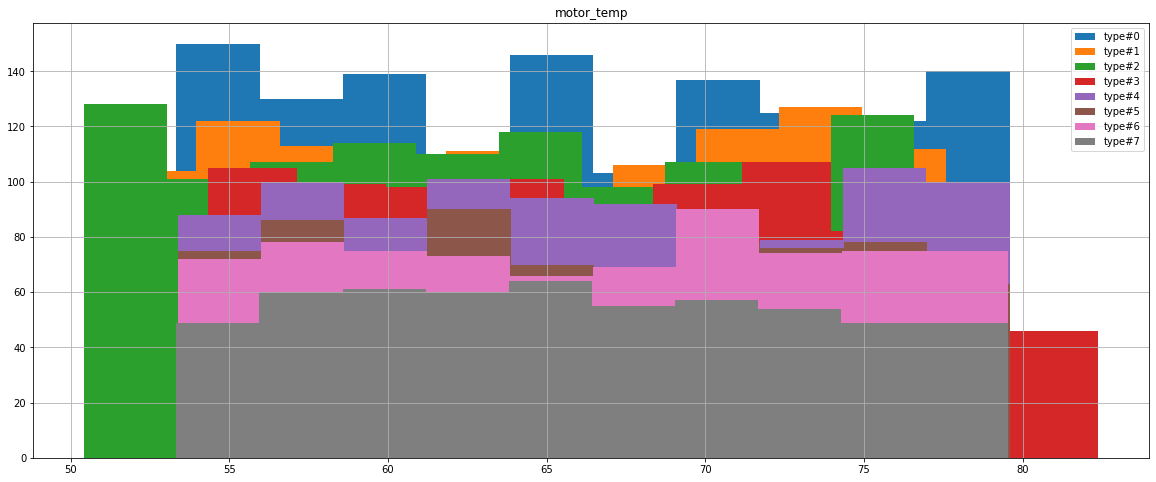

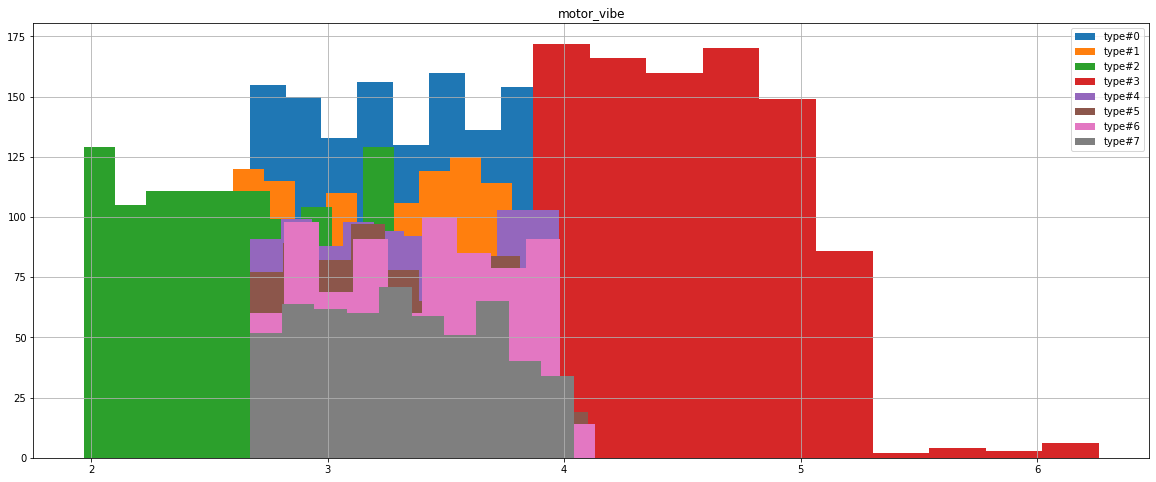

In [16]:
for sensor in sensor_list:
    plt.figure(figsize=(20,8))
    plt.title(f"{sensor}")
    for type, type_df in test_df.groupby("type"):
        # if type not in [0, 4, 5, 6, 7]:
        #     continue
        type_df[sensor].hist(label=f"type#{type}")
    plt.legend()

### PCA & TSNE

In [73]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns

In [74]:
column_list = ['air_inflow', 'air_end_temp', 'motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe', 'out_pressure']
motor_column_list = ['motor_current', 'motor_rpm', 'motor_temp', 'motor_vibe']

In [85]:
df = train_df

In [86]:
input_df = df[motor_column_list]

In [88]:
pca_X = input_df.to_numpy(float)
pca = PCA(n_components=2)
pca.fit(pca_X)
pca_features = pca.transform(pca_X)

Text(0.5, 1.0, '2D PCA Graph')

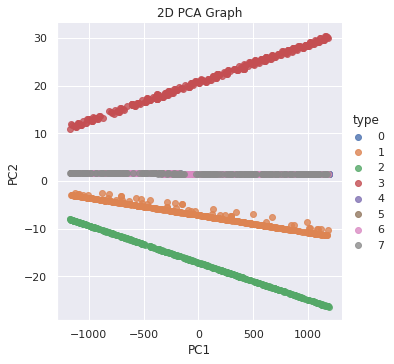

In [89]:
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
pca_df["type"] = df.type

sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    hue='type',
    legend=True,
    data=pca_df,
    fit_reg=False,
)
 
plt.title('2D PCA Graph')